In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [2]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [4]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [5]:
df.dtypes

,0
sno,int64
Temperature,int64
Pressure,float64


In [6]:
df.isna().sum()

,0
sno,0
Temperature,0
Pressure,0


In [9]:
df.drop(['sno'],axis=1)

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


Text(0.5, 1.0, 'Temp-Pressure Graph')

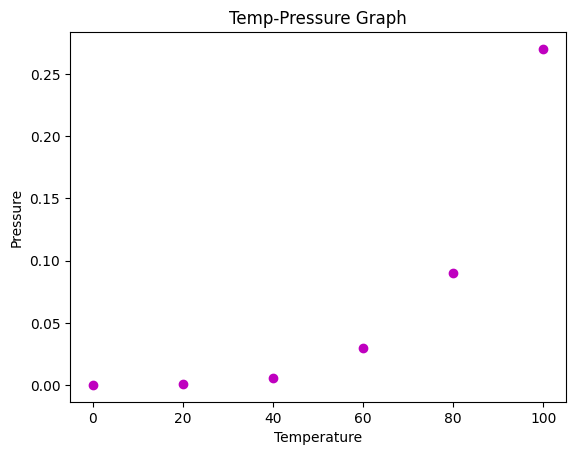

In [27]:
x=df[['Temperature']] # i/p should be 2D
y=df['Pressure']
plt.scatter(x,y,color='m')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temp-Pressure Graph')

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [22]:
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [24]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('MAPE = ',mean_absolute_percentage_error(y,y_pred))
print('R2 Score = ',r2_score(y,y_pred))

MAPE =  44.775078189300416
R2 Score =  0.690349972603981


Text(0.5, 1.0, 'Simple Linear Regression')

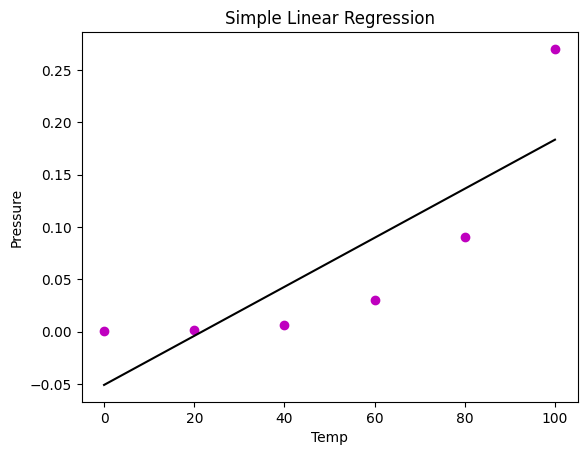

In [32]:
plt.scatter(x,y,color='m')
plt.plot(x,y_pred,color='k')
plt.xlabel('Temp')
plt.ylabel('Pressure')
plt.title('Simple Linear Regression')

Only 1 point is touching the regression line.

Ie y error Percentage is too high and r2_score is low in this simple linear regression model.

So we can achieve high % by polynomial regression.

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3) # features will expand into 4 features
x_poly=poly.fit_transform(x)
x_poly # now i/ps are in this variable

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [34]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly_pred=model1.predict(x_poly)
y_poly_pred

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [36]:
print('MAPE = ',mean_absolute_percentage_error(y,y_poly_pred))
print('R2 Score = ',r2_score(y,y_poly_pred))

MAPE =  2.7865912208923658
R2 Score =  0.9966691251761722


Now error is reduced and r2 score is increased

In [40]:
df1=pd.DataFrame({'Actual Value':y,'Predicted Value(simple)':y_pred,'Predicted (multiple)':y_poly_pred})
df1

,Actual Value,Predicted Value(simple),Predicted (multiple)
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


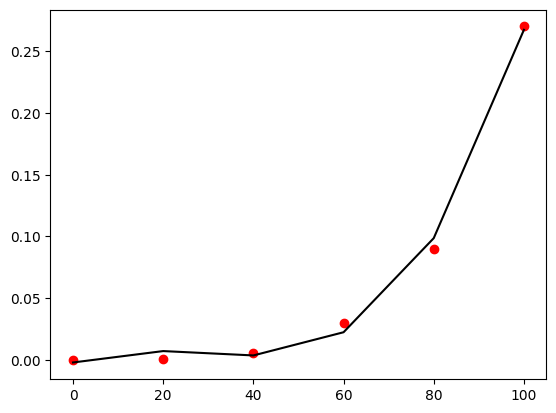

In [42]:
plt.scatter(x,y,color='r')
plt.plot(x,y_poly_pred,color='k')